In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from astropy.table import Table

In [2]:
def make_plot_all(images, column_data, Q=9, stretch=40, minimum=(0,0,0)):
    for i in range(len(images)):
        if(i%8 == 0):
            plt.figure(figsize=(12,2))
            for j in range(8):
                if(i+j > len(images)-1): break
                plt.subplot(1,8,j+1)
                title = '{:.2f}'.format(column_data.iloc[i+j])
                plt.title(title)
                rgb = make_lupton_rgb(images[i+j][2], images[i+j][1], images[i+j][0], 
                                    Q=Q, stretch=stretch, minimum=minimum)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            plt.show() 
    plt.close()  

In [3]:
filepath = '/Users/jimenagonzalez/research/DSPL/Hybrid_SL_Modeling/data/candidates_tocompare/final_files/'

#Diehl candidates 
hdu_list = fits.open(filepath + 'Diehl_DES.fits')
images = hdu_list[1].data.astype(np.float32)
data = Table(hdu_list[2].data).to_pandas() #Data is not complete here, just in the right sort
hdu_list.close()

data.head()

,COADD_OBJECT_ID,TILENAME,HPIX_4096,RA,DEC,Name,Exp_score,AverRad,e_AverRad
0,1041564142,DES0006-4206,145397778,1.513023,-42.137115,DES J0006-4208,1.285714,8.42,0.27
1,1043912783,DES0008-5457,143276729,2.067250,-55.066337,DES J0008-5503,0.428571,3.63,0.27
2,1034619801,DES0000-5248,189797747,359.845460,-52.759880,DES J2359-5245,0.857143,5.29,0.57
3,1042565305,DES0006-4414,145273578,1.685966,-44.497376,DES J0006-4429,0.857143,2.30,0.27
4,1042572859,DES0006-4414,145273600,1.872055,-44.579515,DES J0007-4434,1.714286,3.50,0.27


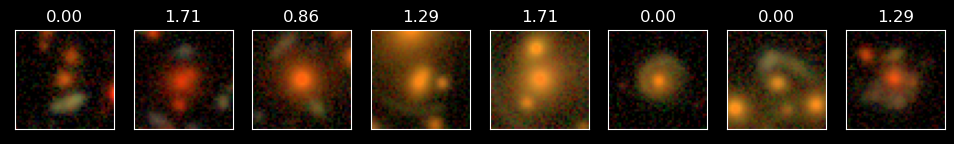

In [4]:
data_tmp = data.sample(8)
images_tmp = images[data_tmp.index]
make_plot_all(images_tmp, data_tmp['Exp_score'])

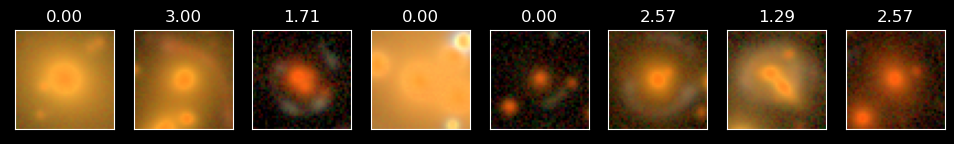

In [5]:
#ODonnell candidates 
hdu_list = fits.open(filepath + 'ODonnell_DES.fits')
images = hdu_list[1].data.astype(np.float32)
data = Table(hdu_list[2].data).to_pandas() #Data is not complete here, just in the right sort
hdu_list.close()

data_tmp = data.sample(8)
images_tmp = images[data_tmp.index]
make_plot_all(images_tmp, data_tmp['Exp_score'])

Index(['COADD_OBJECT_ID', 'TILENAME', 'HPIX_4096', 'RA', 'DEC', 'Name',
       'Exp_score', 'n_Cand', 'rchi2', 'RE', 'U_RE', 'L_RE', 'qm', 'U_qm',
       'L_qm', 'PAm', 'U_PAm', 'L_PAm', 'gammaext', 'U_gammaext', 'L_gammaext',
       'phiext', 'U_phiext', 'L_phiext'],
      dtype='object')


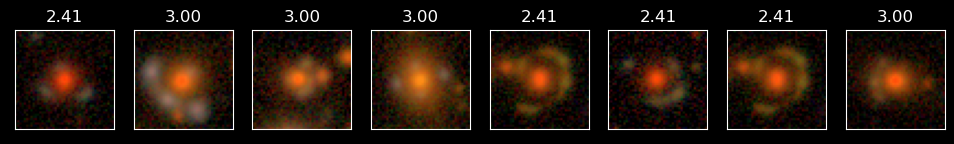

In [6]:
#Rojas candidates 
hdu_list = fits.open(filepath + 'Rojas_DES.fits')
images = hdu_list[1].data.astype(np.float32)
data = Table(hdu_list[2].data).to_pandas() #Data is not complete here, just in the right sort
hdu_list.close()

data_tmp = data.sample(8)
print(data_tmp.columns)
images_tmp = images[data_tmp.index]
make_plot_all(images_tmp, data_tmp['Exp_score'])